# Task 1

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import r_regression, f_regression
from matplotlib.gridspec import GridSpec
from sklearn import preprocessing
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox, yeojohnson
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d

## Dataset
- The leading causes of death by sex and ethnicity in New York City in since 2007.
- Cause of death is derived from the NYC death certificate which is issued for every death that occurs in New York City.- Data Provided by Department of Health and Mental Hygiene (DOHMH)
- 7 Total Features: Year, Leading Cause, Sex, Race Ethnicity, Deaths, Death Rate, Age Adjusted Death Rate


In [2]:
dataset = pd.read_csv('data/death.csv')
dataset

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6
...,...,...,...,...,...,...,...
2097,2021,Essential Hypertension and Renal Diseases (I10...,Female,Not Stated/Unknown,10,NaN,NaN
2098,2021,Human Immunodeficiency Viruses Diseases,Female,Not Stated/Unknown,7,NaN,NaN
2099,2021,Diabetes Mellitus (E10-E14),Female,Not Stated/Unknown,7,NaN,NaN
2100,2021,Alzheimer's Disease (G30),Female,Not Stated/Unknown,7,NaN,NaN


## Preprocessing - Clean, organize and transform raw data for regression and data visualization
#### Drop all NaN values

In [3]:
data = dataset.dropna()
data

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6
...,...,...,...,...,...,...,...
2072,2021,Mental and Behavioral Disorders due to Acciden...,Female,Non-Hispanic Black,229,22.9,20.3
2073,2021,Influenza (Flu) and Pneumonia (J09-J18),Female,Non-Hispanic Black,220,22,15.3
2074,2021,Chronic Lower Respiratory Diseases (J40-J47),Female,Non-Hispanic Black,186,18.6,13.3
2075,2021,Alzheimer's Disease (G30),Female,Non-Hispanic Black,175,17.5,11.1


### Encode Categorical Data
#### Encode Independent Variables (Year, Leading Cause, Sex, Race Ethicity)


In [4]:
edata = pd.get_dummies(data, columns=["Year", "Leading Cause", "Sex", "Race Ethnicity"])

In [5]:
edata[["Year_2007", "Year_2008", "Year_2009", "Year_2010", "Year_2011", "Year_2012", "Year_2013", "Year_2014", "Year_2015", "Year_2016", "Year_2017", "Year_2018", "Year_2019", "Year_2020", "Year_2021", "Leading Cause_Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)", "Leading Cause_Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)", "Leading Cause_All Other Causes", "Leading Cause_Alzheimer's Disease (G30)", "Leading Cause_Aortic Aneurysm and Dissection (I71)", "Leading Cause_Assault (Homicide: U01-U02, Y87.1, X85-Y09)", "Leading Cause_Assault (Homicide: Y87.1, X85-Y09)", "Leading Cause_Atherosclerosis (I70)", "Leading Cause_Cerebrovascular Disease (Stroke: I60-I69)", "Leading Cause_Certain Conditions originating in the Perinatal Period (P00-P96)", "Leading Cause_Chronic Liver Disease and Cirrhosis (K70, K73)", "Leading Cause_Chronic Liver Disease and Cirrhosis (K70, K73-K74)", "Leading Cause_Chronic Lower Respiratory Diseases (J40-J47)", "Leading Cause_Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)", "Leading Cause_Covid-19", "Leading Cause_Diabetes Mellitus (E10-E14)", "Leading Cause_Diseases of Heart (I00-I09, I11, I13, I20-I51)", "Leading Cause_Essential Hypertension and Renal Diseases (I10, I12)", "Leading Cause_Essential Hypertension and Renal Diseases (I10, I12, I15)", "Leading Cause_Human Immunodeficiency Virus Disease (HIV: B20-B24)", "Leading Cause_Influenza (Flu) and Pneumonia (J09-J18)", "Leading Cause_Insitu or Benign / Uncertain Neoplasms (D00-D48)", "Leading Cause_Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)", "Leading Cause_Intentional Self-Harm (Suicide: X60-X84, Y87.0)", "Leading Cause_Malignant Neoplasms (Cancer: C00-C97)", "Leading Cause_Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)", "Leading Cause_Mental and Behavioral Disorders due to Use of Alcohol (F10)", "Leading Cause_Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)", "Leading Cause_Parkinson's Disease (G20)", "Leading Cause_Septicemia (A40-A41)", "Leading Cause_Tuberculosis (A16-A19)", "Leading Cause_Viral Hepatitis (B15-B19)", "Sex_F", "Sex_Female", "Sex_M", "Sex_Male", "Race Ethnicity_Asian and Pacific Islander", "Race Ethnicity_Black Non-Hispanic", "Race Ethnicity_Hispanic", "Race Ethnicity_Non-Hispanic Black", "Race Ethnicity_Non-Hispanic White", "Race Ethnicity_Not Stated/Unknown", "Race Ethnicity_Other Race/ Ethnicity", "Race Ethnicity_White Non-Hispanic"]] = edata[["Year_2007", "Year_2008", "Year_2009", "Year_2010", "Year_2011", "Year_2012", "Year_2013", "Year_2014", "Year_2015", "Year_2016", "Year_2017", "Year_2018", "Year_2019", "Year_2020", "Year_2021", "Leading Cause_Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)", "Leading Cause_Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)", "Leading Cause_All Other Causes", "Leading Cause_Alzheimer's Disease (G30)", "Leading Cause_Aortic Aneurysm and Dissection (I71)", "Leading Cause_Assault (Homicide: U01-U02, Y87.1, X85-Y09)", "Leading Cause_Assault (Homicide: Y87.1, X85-Y09)", "Leading Cause_Atherosclerosis (I70)", "Leading Cause_Cerebrovascular Disease (Stroke: I60-I69)", "Leading Cause_Certain Conditions originating in the Perinatal Period (P00-P96)", "Leading Cause_Chronic Liver Disease and Cirrhosis (K70, K73)", "Leading Cause_Chronic Liver Disease and Cirrhosis (K70, K73-K74)", "Leading Cause_Chronic Lower Respiratory Diseases (J40-J47)", "Leading Cause_Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)", "Leading Cause_Covid-19", "Leading Cause_Diabetes Mellitus (E10-E14)", "Leading Cause_Diseases of Heart (I00-I09, I11, I13, I20-I51)", "Leading Cause_Essential Hypertension and Renal Diseases (I10, I12)", "Leading Cause_Essential Hypertension and Renal Diseases (I10, I12, I15)", "Leading Cause_Human Immunodeficiency Virus Disease (HIV: B20-B24)", "Leading Cause_Influenza (Flu) and Pneumonia (J09-J18)", "Leading Cause_Insitu or Benign / Uncertain Neoplasms (D00-D48)", "Leading Cause_Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)", "Leading Cause_Intentional Self-Harm (Suicide: X60-X84, Y87.0)", "Leading Cause_Malignant Neoplasms (Cancer: C00-C97)", "Leading Cause_Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)", "Leading Cause_Mental and Behavioral Disorders due to Use of Alcohol (F10)", "Leading Cause_Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)", "Leading Cause_Parkinson's Disease (G20)", "Leading Cause_Septicemia (A40-A41)", "Leading Cause_Tuberculosis (A16-A19)", "Leading Cause_Viral Hepatitis (B15-B19)", "Sex_F", "Sex_Female", "Sex_M", "Sex_Male", "Race Ethnicity_Asian and Pacific Islander", "Race Ethnicity_Black Non-Hispanic", "Race Ethnicity_Hispanic", "Race Ethnicity_Non-Hispanic Black", "Race Ethnicity_Non-Hispanic White", "Race Ethnicity_Not Stated/Unknown", "Race Ethnicity_Other Race/ Ethnicity", "Race Ethnicity_White Non-Hispanic"]].astype(int)
edata

,Deaths,Death Rate,Age Adjusted Death Rate,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,...,Sex_M,Sex_Male,Race Ethnicity_Asian and Pacific Islander,Race Ethnicity_Black Non-Hispanic,Race Ethnicity_Hispanic,Race Ethnicity_Non-Hispanic Black,Race Ethnicity_Non-Hispanic White,Race Ethnicity_Not Stated/Unknown,Race Ethnicity_Other Race/ Ethnicity,Race Ethnicity_White Non-Hispanic
0,83,7.9,6.9,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,96,8,8.1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,155,12.9,16,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1445,122.3,160.7,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,14,2.5,3.6,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,229,22.9,20.3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2073,220,22,15.3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2074,186,18.6,13.3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2075,175,17.5,11.1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
categorical_columns=["Year_2007", "Year_2008", "Year_2009", "Year_2010", "Year_2011", "Year_2012", "Year_2013", "Year_2014", "Year_2015", "Year_2016", "Year_2017", "Year_2018", "Year_2019", "Year_2020", "Year_2021", "Leading Cause_Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)", "Leading Cause_Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)", "Leading Cause_All Other Causes", "Leading Cause_Alzheimer's Disease (G30)", "Leading Cause_Aortic Aneurysm and Dissection (I71)", "Leading Cause_Assault (Homicide: U01-U02, Y87.1, X85-Y09)", "Leading Cause_Assault (Homicide: Y87.1, X85-Y09)", "Leading Cause_Atherosclerosis (I70)", "Leading Cause_Cerebrovascular Disease (Stroke: I60-I69)", "Leading Cause_Certain Conditions originating in the Perinatal Period (P00-P96)", "Leading Cause_Chronic Liver Disease and Cirrhosis (K70, K73)", "Leading Cause_Chronic Liver Disease and Cirrhosis (K70, K73-K74)", "Leading Cause_Chronic Lower Respiratory Diseases (J40-J47)", "Leading Cause_Congenital Malformations, Deformations, and Chromosomal Abnormalities (Q00-Q99)", "Leading Cause_Covid-19", "Leading Cause_Diabetes Mellitus (E10-E14)", "Leading Cause_Diseases of Heart (I00-I09, I11, I13, I20-I51)", "Leading Cause_Essential Hypertension and Renal Diseases (I10, I12)", "Leading Cause_Essential Hypertension and Renal Diseases (I10, I12, I15)", "Leading Cause_Human Immunodeficiency Virus Disease (HIV: B20-B24)", "Leading Cause_Influenza (Flu) and Pneumonia (J09-J18)", "Leading Cause_Insitu or Benign / Uncertain Neoplasms (D00-D48)", "Leading Cause_Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)", "Leading Cause_Intentional Self-Harm (Suicide: X60-X84, Y87.0)", "Leading Cause_Malignant Neoplasms (Cancer: C00-C97)", "Leading Cause_Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)", "Leading Cause_Mental and Behavioral Disorders due to Use of Alcohol (F10)", "Leading Cause_Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)", "Leading Cause_Parkinson's Disease (G20)", "Leading Cause_Septicemia (A40-A41)", "Leading Cause_Tuberculosis (A16-A19)", "Leading Cause_Viral Hepatitis (B15-B19)", "Sex_F", "Sex_Female", "Sex_M", "Sex_Male", "Race Ethnicity_Asian and Pacific Islander", "Race Ethnicity_Black Non-Hispanic", "Race Ethnicity_Hispanic", "Race Ethnicity_Non-Hispanic Black", "Race Ethnicity_Non-Hispanic White", "Race Ethnicity_Not Stated/Unknown", "Race Ethnicity_Other Race/ Ethnicity", "Race Ethnicity_White Non-Hispanic"]
numeric_columns=["Deaths","Death Rate", "Age Adjusted Death Rate"]
tot_columns=numeric_columns+categorical_columns

edata[numeric_columns] = edata[numeric_columns].replace('.', np.nan)

### Feature Scaling
#### Standardization
- Standardization is used because it is preferable for regression analysis especially since my features have different units or large variance.

In [7]:
original = edata[numeric_columns]
standardizedArray = preprocessing.scale(original)

standardized = pd.DataFrame(standardizedArray, columns=numeric_columns)
standardized

,Deaths,Death Rate,Age Adjusted Death Rate
0,-0.486391,-0.639905,-0.686014
1,-0.471739,-0.638582,-0.668389
2,-0.405242,-0.573742,-0.552358
3,1.048660,0.873906,1.572925
4,-0.564157,-0.711361,-0.734483
...,...,...,...
1754,-0.321840,-0.441416,-0.489201
1755,-0.331984,-0.453325,-0.562639
1756,-0.370304,-0.498316,-0.592014
1757,-0.382701,-0.512872,-0.624326


# Task 2
### Trend Line

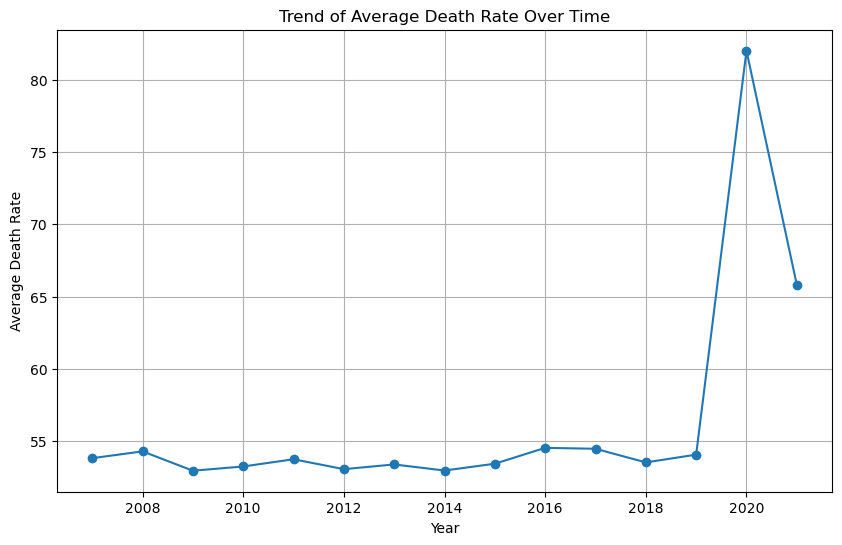

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data.loc[:, 'Death Rate'] = pd.to_numeric(data['Death Rate'].replace('.', np.nan))
data = data.dropna(subset=['Death Rate'])

average_death_rate_by_year = data.groupby('Year')['Death Rate'].mean()

plt.figure(figsize=(10, 6))
average_death_rate_by_year.plot(marker='o')
plt.title("Trend of Average Death Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Average Death Rate")
plt.grid(True)
plt.show()


### Heatmap of Alzheimer's Death Rate and Ethnicity

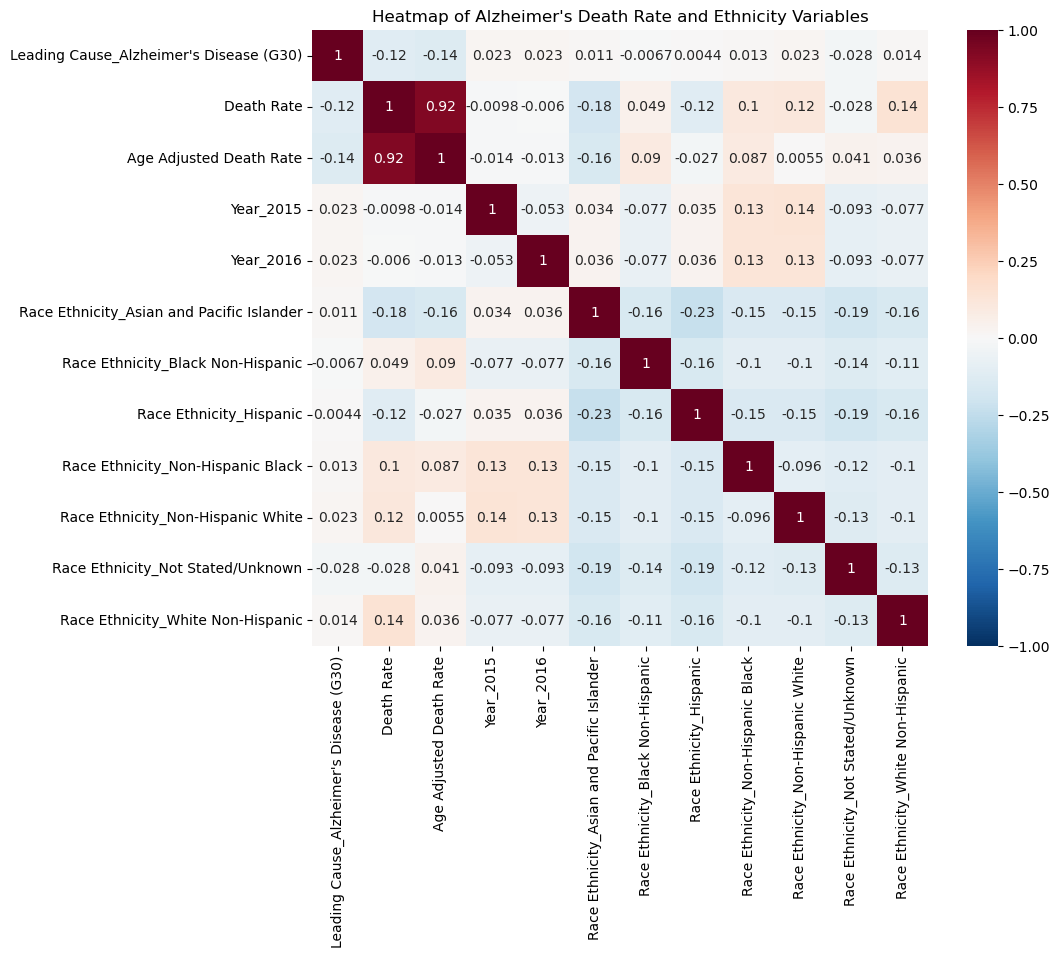

In [10]:
selected_columns = ["Leading Cause_Alzheimer's Disease (G30)",'Death Rate', 'Age Adjusted Death Rate', 'Year_2015', 'Year_2016', 
                    'Race Ethnicity_Asian and Pacific Islander',
       'Race Ethnicity_Black Non-Hispanic', 'Race Ethnicity_Hispanic',
       'Race Ethnicity_Non-Hispanic Black',
       'Race Ethnicity_Non-Hispanic White',
       'Race Ethnicity_Not Stated/Unknown',
       'Race Ethnicity_White Non-Hispanic']

corr_subset = edata[selected_columns].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_subset,
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1,
    square=True
)
plt.title("Heatmap of Alzheimer's Death Rate and Ethnicity Variables")
plt.show()


### Bar Plot

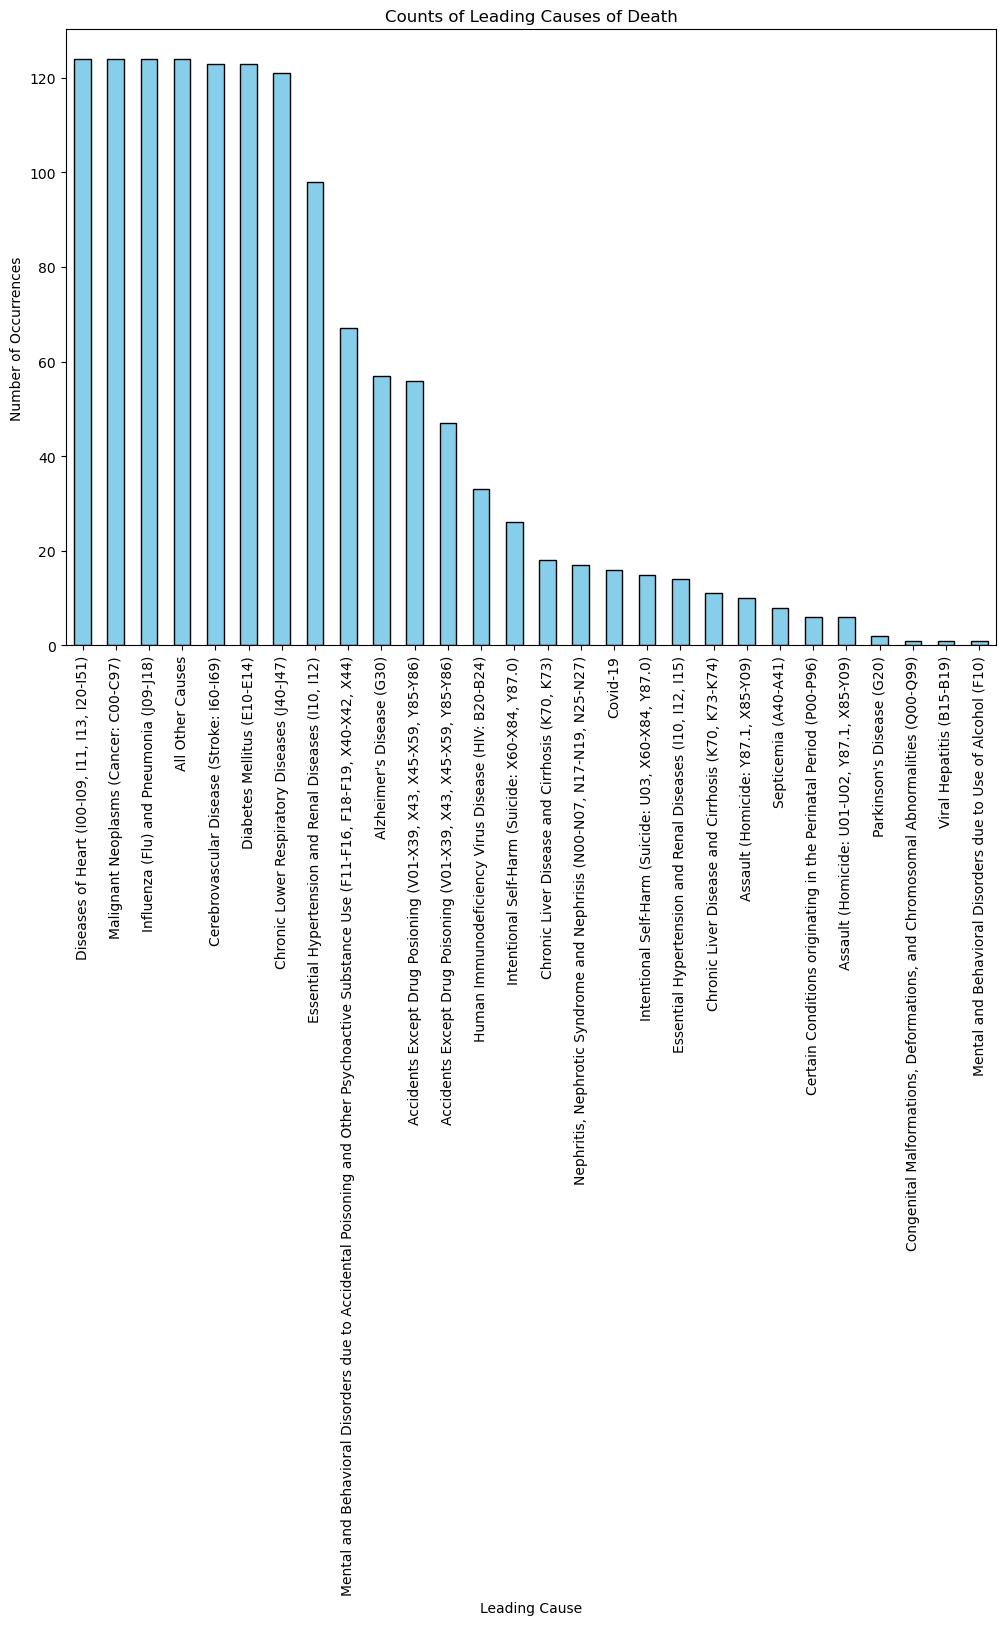

In [11]:
leading_cause_counts = data['Leading Cause'].value_counts()

plt.figure(figsize=(12, 8))
leading_cause_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Counts of Leading Causes of Death")
plt.xlabel("Leading Cause")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=90)
plt.show()


### Box Plot

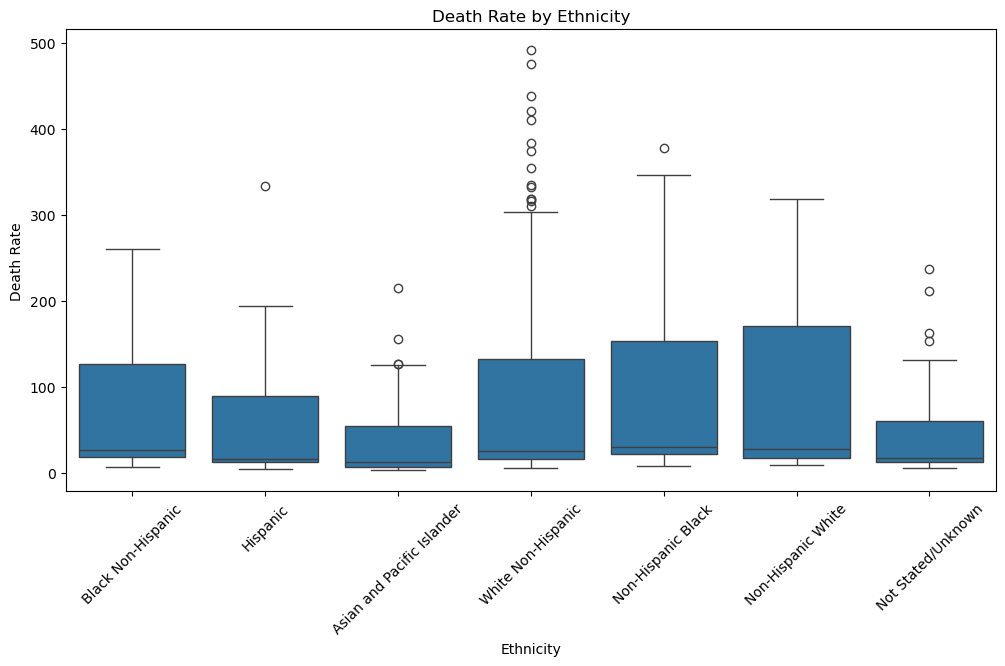

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data, x='Race Ethnicity', y='Death Rate')
plt.title("Death Rate by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Death Rate")
plt.xticks(rotation=45)
plt.show()


# Task 3

#### Testing and Training Sets

In [37]:
X_features = edata[tot_columns]
y = edata['Death Rate'].values 
y = np.where(np.isnan(y), np.nanmean(y), y)
corr_matrix = X_features.corr().abs()
threshold = 0.8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]


X_features_reduced = X_features.drop(columns=to_drop)
print("Dropped features due to multicollinearity:", to_drop)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_features_reduced)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Dropped features due to multicollinearity: ['Death Rate', 'Age Adjusted Death Rate']
Mean Absolute Error (MAE): 9.646321912283733
R-squared (R²): 0.9595172378906325
Intercept: 14.811622229833723
Coefficients: [ 6.54454083e-02 -1.47428443e+00 -5.49159337e-01 -1.25258493e+00
 -9.48458502e-01 -9.39290734e-01  5.97739986e-01  2.16478149e+00
  1.57051380e+00 -1.84385292e+00 -7.00554692e-01 -4.19433697e-01
  3.58562817e-01  8.26927258e-01  2.57063879e+00  3.84551049e-02
 -4.34636790e+00  1.07704535e+00  2.67895241e+01 -2.22817455e+00
 -1.08032611e+01 -1.61187901e+01 -4.15480475e+00 -8.12125248e+00
  1.55343551e-01  1.08454779e-01 -2.16882077e+00 -7.96946568e+00
 -1.63727158e+00 -1.10531740e+01  4.06894187e+01  1.66773426e+00
  4.12713669e+01 -2.92280824e+00 -4.35606501e+00  1.29577336e-01
  1.39948446e+00  1.00269096e+00 -8.25103557e+00 -2.57702086e+00
  3.18679727e+01  1.00946427e+00 -1.47225868e+01 -1.02109147e+01
 -1.06964739e+01  3.56124569e-01 -1.15718504e+01 -1.36140637e+01
 -3.1342907

## Interpretation

In [45]:
sample = X_test[0]
predicted_death_rate = model.predict([sample])[0]
print("Predicted Death Rate for the sample:", predicted_death_rate)


Predicted Death Rate for the sample: 11.17924133678245


In [46]:
# Print each feature's contribution to the prediction
print("Feature contributions to the prediction:")
for feature_value, coef, feature_name in zip(sample, model.coef_, X_features_reduced.columns):
    contribution = feature_value * coef
    print(f"{feature_name}: {contribution:.4f}")


Feature contributions to the prediction:
Deaths: 5.1702
Year_2007: -0.0000
Year_2008: -0.0000
Year_2009: -0.0000
Year_2010: -0.0000
Year_2011: -0.0000
Year_2012: 0.0000
Year_2013: 0.0000
Year_2014: 0.0000
Year_2015: -1.8439
Year_2016: -0.0000
Year_2017: -0.0000
Year_2018: 0.0000
Year_2019: 0.0000
Year_2020: 0.0000
Year_2021: 0.0000
Leading Cause_Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86): -0.0000
Leading Cause_Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86): 0.0000
Leading Cause_All Other Causes: 0.0000
Leading Cause_Alzheimer's Disease (G30): -0.0000
Leading Cause_Aortic Aneurysm and Dissection (I71): -0.0000
Leading Cause_Assault (Homicide: U01-U02, Y87.1, X85-Y09): -0.0000
Leading Cause_Assault (Homicide: Y87.1, X85-Y09): -0.0000
Leading Cause_Atherosclerosis (I70): -0.0000
Leading Cause_Cerebrovascular Disease (Stroke: I60-I69): 0.0000
Leading Cause_Certain Conditions originating in the Perinatal Period (P00-P96): 0.0000
Leading Cause_Chronic 

In [47]:
print("Feature contributions to the prediction:")
for feature_value, coef, feature_name in zip(sample, model.coef_, X_features_reduced.columns):
    contribution = feature_value * coef
    print(f"{feature_name}: {contribution:.4f}")

print("\nInterpretation:")
print(f"The predicted Death Rate ({predicted_death_rate:.4f}) is calculated as the intercept ({model.intercept_:.4f}) plus the sum of each feature's contribution.")


Feature contributions to the prediction:
Deaths: 5.1702
Year_2007: -0.0000
Year_2008: -0.0000
Year_2009: -0.0000
Year_2010: -0.0000
Year_2011: -0.0000
Year_2012: 0.0000
Year_2013: 0.0000
Year_2014: 0.0000
Year_2015: -1.8439
Year_2016: -0.0000
Year_2017: -0.0000
Year_2018: 0.0000
Year_2019: 0.0000
Year_2020: 0.0000
Year_2021: 0.0000
Leading Cause_Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86): -0.0000
Leading Cause_Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86): 0.0000
Leading Cause_All Other Causes: 0.0000
Leading Cause_Alzheimer's Disease (G30): -0.0000
Leading Cause_Aortic Aneurysm and Dissection (I71): -0.0000
Leading Cause_Assault (Homicide: U01-U02, Y87.1, X85-Y09): -0.0000
Leading Cause_Assault (Homicide: Y87.1, X85-Y09): -0.0000
Leading Cause_Atherosclerosis (I70): -0.0000
Leading Cause_Cerebrovascular Disease (Stroke: I60-I69): 0.0000
Leading Cause_Certain Conditions originating in the Perinatal Period (P00-P96): 0.0000
Leading Cause_Chronic 

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target variable
X_features = edata[tot_columns]
y = edata['Death Rate'].values

# Replace NaN values in the target variable with the mean
y = np.where(np.isnan(y), np.nanmean(y), y)

# Impute missing values in the features with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_features)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Mean Absolute Error (MAE): 2.3173899667903375e-12
R-squared (R²): 1.0
Intercept: -2.1813661987835076e-12
Coefficients: [ 4.55714166e-15  1.00000000e+00 -1.11022302e-16 -4.31078784e-15
 -3.93126287e-15 -9.87578075e-15  5.74670520e-15  1.86916455e-15
  2.80905941e-15  2.99185589e-15  8.43509290e-17 -6.37619298e-16
  9.03601196e-16  1.95047971e-16  2.74682620e-15  3.63316148e-16
  1.22373899e-15 -1.88868018e-16  4.46149194e-17  3.89201475e-16
 -6.88793640e-16  6.11218975e-16 -1.92239887e-15  7.52219467e-16
  8.76197986e-16 -1.55463750e-15  5.59773582e-16  8.40175369e-16
 -3.24284870e-16  7.54604712e-17  4.00721123e-16  4.91143584e-16
 -2.50266387e-15 -3.97387201e-16  3.74049750e-16  9.04658293e-16
 -4.52152964e-16  1.62830903e-15 -1.12399239e-15 -2.80165973e-15
 -1.78622308e-17  7.11643201e-16 -4.52491777e-16  7.00231973e-16
 -2.91501307e-16  1.48405593e-15  4.13324973e-16  1.08958253e-15
  7.51636709e-16 -5.55924664e-16 -1.88434338e-16  7.99707522e-16
 -1.63801264e-15  1.06989070e-15  8.

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

selected_features = ['Deaths', 'Race Ethnicity_Hispanic'] 
X_features = edata[selected_features]
y = edata['Death Rate'].values

y = np.where(np.isnan(y), np.nanmean(y), y)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Mean Absolute Error (MAE): 18.640391364190954
R-squared (R²): 0.8728204005192494
Intercept: 21.741932714006012
Coefficients: [  0.07268623 -16.90013435]


In [53]:
sample = np.array([[100, 1]]) 

predicted_death_rate = model.predict(sample)[0]
print("Predicted Death Rate for the sample:", predicted_death_rate)

Predicted Death Rate for the sample: 12.110421832201936
